In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.svm as svm
%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)
plt.rcParams["figure.figsize"] = [12,7]

import numpy.random as rand

# generate linear 2d data and plot
def gen_linear(num_points):
    X = rand.rand(num_points*2,2)
    y = np.array([0]*num_points+[1]*num_points)
    for i in xrange(num_points):
        X[i,1] = X[i,0]-0.4+rand.normal(scale=0.1)
        X[num_points+i,1] = X[num_points+i,0]+0.4+rand.normal(scale=0.1)
        
    return X, y

xlin, ylin = gen_linear(200)
# also create a mesh to do contour plots
# create a mesh to plot in
h = 0.02
x_min, x_max = xlin[:, 0].min() - 0.1, xlin[:, 0].max() + .1
y_min, y_max = xlin[:, 1].min() - .1, xlin[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Deep Networks

$$
f(y) = \sigma(w_{4l} \sum_k \sigma(w_{3k} \sum_j \sigma(w_{2j} \sum_i \sigma(w_{1i} y + b_{1i}) + b_{2j}) + b_{3k}) + b_{4l})
$$

- $\sigma$ is a non-linear (but simple) activation function
- most commonly these days a Rectified Linear Unit (RELU):
$$
\sigma(y) = \max(0,y)
$$

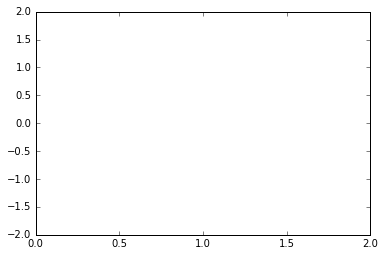

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
scat = ax.scatter([], [])

xstart1 = np.linspace(0,10,200)
ystart1 = 0.07*xstart1**3-0.7*xstart1**2+0.15*xstart1 + 12 + rand.rand()
xstart2 = np.linspace(0,10,200)
ystart2 = 0.07*xstart2**3-0.7*xstart2**2+0.15*xstart2 + 8 + rand.rand()

# initialization function: plot the background of each frame
def init():
    scat.set_offsets([])
    return scat,

# animation function.  This is called sequentially
def animate(i):
    alpha = float(i)/200
    data = np.hstack(((1-alpha)*xstart1+alpha*xstart2, (1-alpha)*ystart1+alpha*ystart2))
    data = data.reshape((200,2))
    scat.set_offsets(data)
    return scat,




In [35]:
HTML("""
<video controls>
  <source src="Figs/transform.mp4" type="video/mp4">
</video>
""")

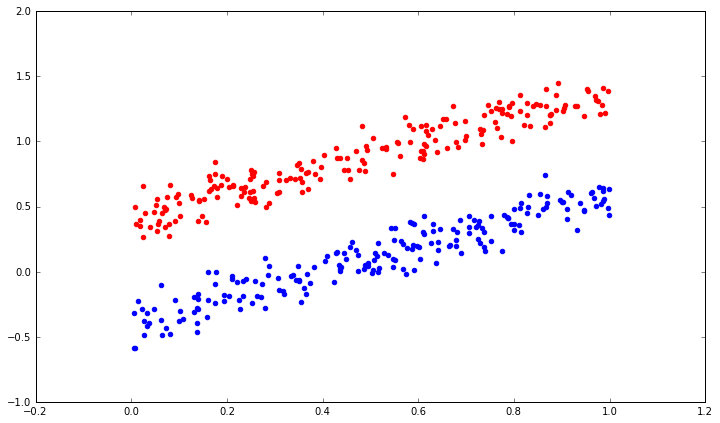

In [44]:

plt.scatter(xlin[:200,0],xlin[:200,1], color='blue')
plt.scatter(xlin[200:400,0], xlin[200:400,1], color='red')


# Simple Neural Network with TensorFlow

In [2]:
# generate Deep Neural network
# Specify that all features have real-value data
tf.logging.set_verbosity(tf.logging.INFO)
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=2)]

clf = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                     hidden_units=[2,2],
                                     optimizer=tf.train.AdagradOptimizer(learning_rate=.01),
                                     n_classes=2)

clf.fit(xlin, ylin, steps=1000)
accuracy_score = clf.evaluate(x=xlin,y=ylin)["accuracy"]

print "training accuracy = ", accuracy_score

# predict the class for each of the points in the grid
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(list(clf.predict(np.c_[xx.ravel(), yy.ravel()], as_iterable=True)))
Z = Z.reshape(xx.shape)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'save_summary_steps': 100, '_num_ps_replicas': 0, '_task_type': None, '_environment': 'local', '_is_chief': True, 'save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11f9bcf90>, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, 'tf_random_seed': None, 'keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', 'save_checkpoints_steps': None, '_master': '', 'keep_checkpoint_max': 5}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_si

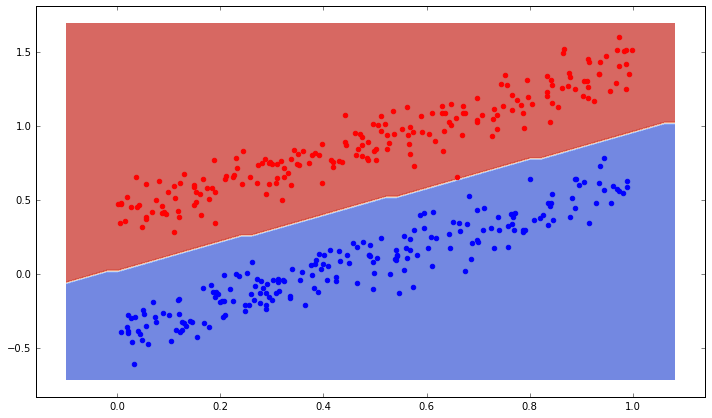

In [3]:
# plot the results as a shaded map
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(xlin[:200,0],xlin[:200,1], color='blue')
plt.scatter(xlin[200:400,0], xlin[200:400,1], color='red')

# Exercise

- The above network often doesn't work.
- See if you can get it to work.
- Things to try include:
    - changing the number of steps
    - changing the architecture (adding more neurons or more layers)
    - changing the learning rate

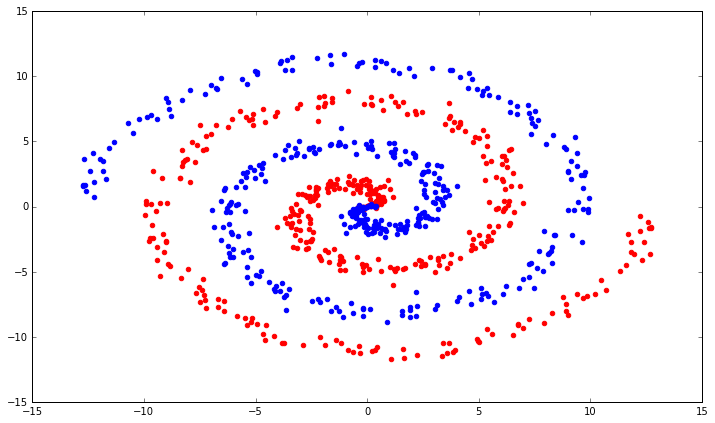

In [58]:
# let's try some more interesting data -  a spiral
num_data = 400
theta = np.linspace(0,4*math.pi,num_data)
theta = theta + rand.normal(size=num_data,scale=.1)
r = theta + rand.normal(size=num_data,scale=0.4)
xspiral = r*np.cos(theta)
yspiral = r*np.sin(theta)
xs2 = -r*np.cos(theta)
ys2 = -r*np.sin(theta)
plt.scatter(xspiral,yspiral, color='red')
plt.scatter(xs2,ys2, color='blue')

blue = np.column_stack((xspiral,yspiral))
red = np.column_stack((xs2,ys2))
xspiral = np.row_stack((blue,red))
yspiral = np.array([0]*num_data+[1]*num_data)

x_min, x_max = xspiral[:, 0].min() - 0.1, xspiral[:, 0].max() + .1
y_min, y_max = xspiral[:, 1].min() - .1, xspiral[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving 

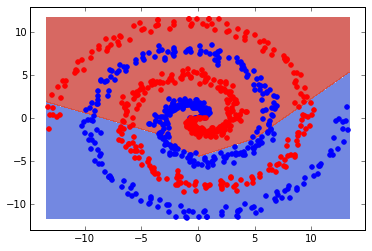

In [26]:
# try a linear svm
# generate linear svm

clf = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                     hidden_units=[3,2],
                                     optimizer='Adagrad',
                                     n_classes=2)

clf.fit(xspiral, yspiral, steps=1000)

# predict the class for each of the points in the grid
Z = np.array(list(clf.predict(np.c_[xx.ravel(), yy.ravel()], as_iterable=True)))
Z = Z.reshape(xx.shape)



In [ ]:
# plot the results as a shaded map
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(xspiral[:num_data,0],xspiral[:num_data,1], color='blue')
plt.scatter(xspiral[num_data:,0], xspiral[num_data:,1], color='red')


# Exercise
- Once again this network doesn't work
- Try updating the parameters to get it to work

In [59]:
clf = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                     hidden_units=[10,10],
                                     optimizer='Adagrad',
                                     n_classes=2)

clf.fit(xspiral, yspiral, steps=20000)

# predict the class for each of the points in the grid
Z = np.array(list(clf.predict(np.c_[xx.ravel(), yy.ravel()], as_iterable=True)))
Z = Z.reshape(xx.shape)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'save_summary_steps': 100, '_num_ps_replicas': 0, '_task_type': None, '_environment': 'local', '_is_chief': True, 'save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x126b2ab50>, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, 'tf_random_seed': None, 'keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', 'save_checkpoints_steps': None, '_master': '', 'keep_checkpoint_max': 5}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_si

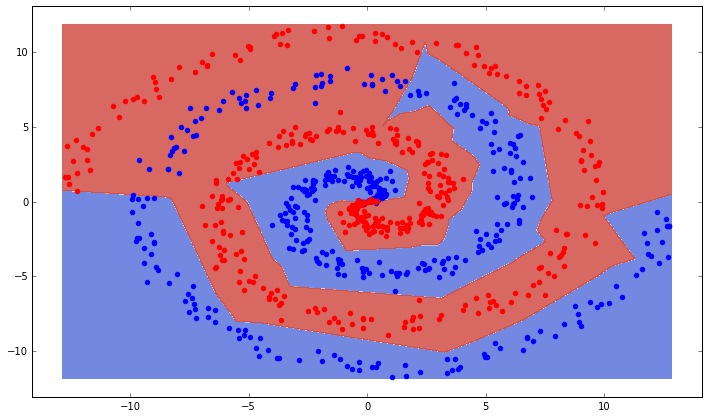

In [60]:
# plot the results as a shaded map
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(xspiral[:num_data,0],xspiral[:num_data,1], color='blue')
plt.scatter(xspiral[num_data:,0], xspiral[num_data:,1], color='red')